# Chapter 5 - Examples of Data Analysis

In [1]:
import pyjags
#import assistant classes from parent directory
#jupyter needs a standard way to do relative imports.
import os
nb_path = os.getcwd()
parent_path = os.path.split(nb_path)[0]
os.chdir(parent_path)
from pjbcmassistant import model_handler
from pjbcmassistant import sample_handler
os.chdir(nb_path)

## 5.1 - Pearson Correlation

In [2]:
spec = """
model:
Correlation_1.txt

settings:
chains = 3
samples = 1000
thinning = 0
burnin = 1000

data:
x = [[0.8, 102],[1.0,  98],[0.5, 100],[0.9, 105],[0.7, 103],[0.4, 110],[1.2,  99],[1.4,  87],[0.6, 113],[1.1,  89],[1.3,  93]]

n = np.shape(x)[0]

sample:
r
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00


In [3]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
mu_0,0.923774,0.108364,0.921908,0.918223,"[0.621, 1.182]","[0.718, 1.144]"
mu_1,99.143394,2.667607,99.203169,98.165804,"[90.429, 104.707]","[93.547, 104.341]"
r,-0.693008,0.161785,-0.724584,-0.827163,"[-0.968, -0.283]","[-0.916, -0.303]"
sigma_0,0.346108,0.078967,0.334813,0.299179,"[0.191, 0.565]","[0.229, 0.537]"
sigma_1,8.462443,2.010415,8.085916,7.108695,"[5.021, 14.522]","[5.633, 13.345]"


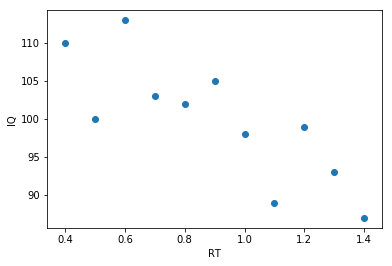

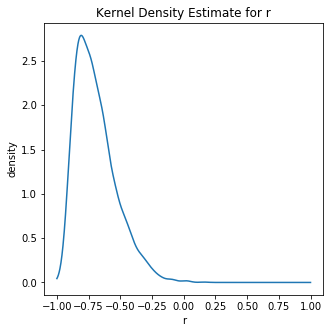

maximum density observed across 1000 bins was at x = -0.8078


In [4]:
#Plot the input data:
#####roll this into assistant if we need it
import matplotlib.pyplot as plt
import numpy as np

datax = np.array(modelbuddy.data['x'])[:,0]
datay = np.array(modelbuddy.data['x'])[:,1]

plt.xlabel('RT')
plt.ylabel('IQ')
plt.scatter(datax, datay);

#visualize the posterior density
samplebuddy.vizkde('r', range=(-1,1), showmax=True)


## 5.2 - Pearson Correlation with Uncertainty

In [5]:
spec = """
model:
Correlation_2.txt

settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
x = [[0.8, 102],[1.0,  98],[0.5, 100],[0.9, 105],[0.7, 103],[0.4, 110],[1.2,  99],[1.4,  87],[0.6, 113],[1.1,  89],[1.3,  93]]

n = np.shape(x)[0]

lambdaerror = np.divide(1,(np.square(np.array([.03, 10]))))
# this is getting out of hand. do the users know python or not?

sample:
r
mu
sigma

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 9000 of 9000, elapsed 0:00:02, remaining 0:00:00


In [6]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
mu_0,0.900601,0.109807,0.901241,0.904838,"[0.63, 1.14]","[0.683, 1.114]"
mu_1,98.864491,3.019199,98.890744,98.672312,"[92.083, 104.991]","[92.871, 104.61]"
r,-0.336152,0.532299,-0.480059,-0.949286,"[-0.999, 0.98]","[-0.977, 0.871]"
sigma_0,0.353645,0.089755,0.338161,0.332584,"[0.205, 0.573]","[0.227, 0.571]"
sigma_1,2.869835,2.952894,1.720372,0.706227,"[0.066, 12.147]","[0.133, 10.867]"


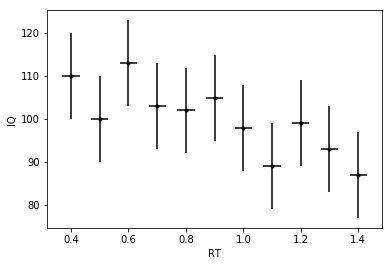

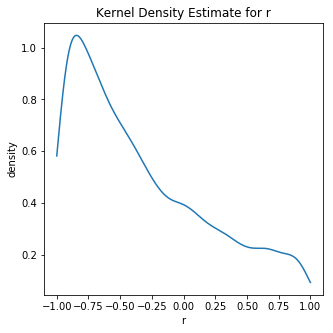

maximum density observed across 1000 bins was at x = -0.8438


In [7]:
#Plot the input data:
#####roll this into assistant if we need it
import matplotlib.pyplot as plt
import numpy as np

datax = np.array(modelbuddy.data['x'])[:,0]
datay = np.array(modelbuddy.data['x'])[:,1]

plt.xlabel('RT')
plt.ylabel('IQ')
plt.errorbar(datax, datay, xerr=.03, yerr=10, fmt='k.');

#visualize the posterior density
samplebuddy.vizkde('r', range=(-1,1), showmax=True)


## 5.3 - The Kappa Coefficient of Agreement

In [8]:
spec = """
model:
Kappa.txt

settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
#y = [14, 4, 5, 210]   # Influenza
#y = [20, 7, 103, 417] # Hearing Loss
y = [0, 0, 13, 157]  # Rare Disease

n = sum(y)

sample:
kappa
xi
psi
alpha
beta
gamma
pi

"""

modelbuddy = model_handler(spec)

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 9000 of 9000, elapsed 0:00:00, remaining 0:00:00


In [9]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
alpha,0.005751,0.005629,0.004010,0.000249,"[0.0, 0.024]","[0.0, 0.021]"
beta,0.504508,0.288873,0.512436,0.684941,"[0.0, 1.0]","[0.026, 0.975]"
gamma,0.918887,0.021009,0.920536,0.924165,"[0.858, 0.961]","[0.873, 0.955]"
kappa,0.053242,0.066507,0.028641,0.004885,"[-0.02, 0.266]","[-0.006, 0.243]"
pi_0,0.002920,0.003709,0.001551,0.000199,"[0.0, 0.014]","[0.0, 0.014]"
pi_1,0.002831,0.003621,0.001533,0.000184,"[0.0, 0.013]","[0.0, 0.013]"
pi_2,0.080644,0.020879,0.078949,0.075172,"[0.037, 0.133]","[0.045, 0.126]"
pi_3,0.913605,0.021634,0.915384,0.915017,"[0.861, 0.957]","[0.866, 0.951]"
psi,0.911678,0.022067,0.913660,0.914871,"[0.846, 0.956]","[0.864, 0.95]"
xi,0.916525,0.021204,0.918244,0.923880,"[0.863, 0.958]","[0.87, 0.953]"


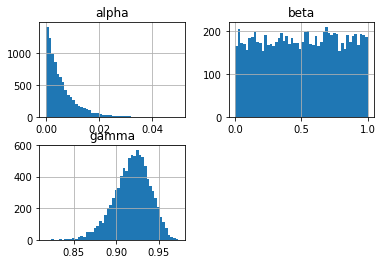

In [10]:
samplebuddy.vizhist('alpha','beta','gamma')

all PSRF values < 1.05 | maximum PSRF: pi_0 at 1.000384875551237.


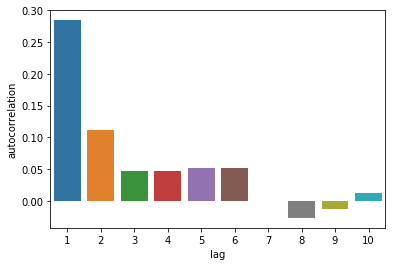

In [11]:
samplebuddy.diagnostic()
samplebuddy.autocorr('gamma')

## 5.4 - Change Detection in Time Series Data

In [12]:
timeseries = np.array([float(i) for i in open('changepointdata.txt','r')])

In [19]:
spec = """
model:
ChangeDetection.txt

settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
#all data calculated below.

sample:
mu
sigma
tau

"""

modelbuddy = model_handler(spec)


#data values are calculated and passed to the handler.
time_series = np.array([float(i) for i in open('changepointdata.txt','r')])
modelbuddy.setdata('c', time_series)
modelbuddy.setdata('n', len(time_series))
modelbuddy.setdata('t', [i for i in range(len(time_series))])

model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

adapting: iterations 3000 of 3000, elapsed 0:00:06, remaining 0:00:00
adapting: iterations 3000 of 3000, elapsed 0:00:06, remaining 0:00:00
sampling: iterations 4803 of 9000, elapsed 0:00:08, remaining 0:00:07
sampling: iterations 7629 of 9000, elapsed 0:00:14, remaining 0:00:02
sampling: iterations 9000 of 9000, elapsed 0:00:16, remaining 0:00:00


In [20]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
mu_0,37.877525,0.253097,37.876532,37.877232,"[37.178, 38.529]","[37.386, 38.372]"
mu_1,30.566508,0.328410,30.566890,30.597915,"[29.813, 31.304]","[29.923, 31.214]"
sigma,6.849501,0.141572,6.846315,6.843498,"[6.532, 7.145]","[6.581, 7.13]"
tau,731.438187,2.432919,730.778661,730.412073,"[727.077, 737.982]","[728.053, 737.145]"


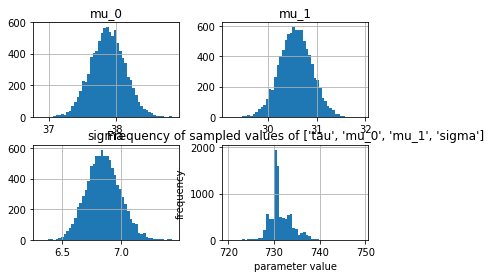

In [21]:
samplebuddy.vizhist('tau','mu_0','mu_1','sigma')
#TODO: fix this visualization layout.

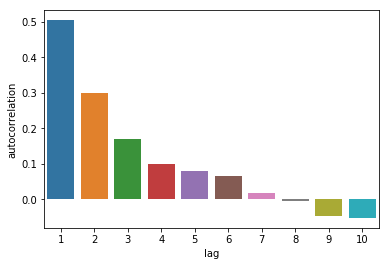

In [22]:
samplebuddy.autocorr('tau')

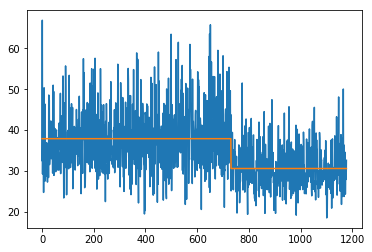

In [17]:
plt.plot(modelbuddy.data['c'])
plt.plot([samplebuddy.getstatistic('mu_0','mean') for i in range(int(samplebuddy.getstatistic('tau','mean')))]+[samplebuddy.getstatistic('mu_1','mean') for i in range(modelbuddy.data['n'] - int(samplebuddy.getstatistic('tau','mean')))]);
#TODO: write this elegantly.

## 5.5 - Censored Data

There's a major bug here that I can't replicate in `MATLAB`. I think it has to do with how `pyjags` is handling NaN values. 

`MATLAB`/`JAGS`/`Trinity` are perfectly happy with a variety of models that, in `pyjags`, all throw the ungooglable error "Error calculting\[sic\] log density". I'm not sure whose source code that's written in, but I couldn't find it in `pyjags`.

The common thread in the failing models is that NaN values have been passed to `JAGS` as data in the line, eg, `datawithNaNs[i] ~ dbin(variablerate, 10)`.

This fails on at least `dbin`,`dnorm`, and `dgamma`, but *not* on `dunif`.

This does *not* fail if the distribution parameters are fixed rather than variable.

My understanding is that with NaN values, `JAGS` is meant to make a prediction of the value according to the posterior distribution, 'imputation'.

In what might be related, when using `JAGS` models that directly assign `NA` values to parameters, as `notanumber <- NA`, I get the error `"Unknown variable NA"`, despite seeing this construction in the [official JAGS user manual](https://www.stats.ox.ac.uk/~nicholls/MScMCMC14/jags_user_manual.pdf)

This makes me suspect some sort of issue with how `pyjags` is handling the model prior to sending it to `JAGS`.

In [18]:
spec = """
model:
ChaSaSoonJ.txt
#okay, what in the world is happening with this model?
#it looks like NaN values are breaking JAGS's log likelihood
#calculations, so we can't use the model from the text...
#What's the situation with this?
#Is there an alternative model that's less of a 'hack'?

settings:
chains = 1 #3
samples = 100 #2000
thinning = 0
burnin = 1000

data:
nattempts = 950
#nfails = 949
n = 50

sample:
theta
z

"""

modelbuddy = model_handler(spec)

modelbuddy.init = {'theta':.5}
#data values are calculated and passed to the handler.
nattempts = 950
nfails = 949
censoring = np.append(np.ones(nfails),0)
scores = np.empty(nattempts)
scores[:] = float('nan')
scores[-1] = 30
modelbuddy.setdata('y', censoring)
modelbuddy.setdata('z', scores)


model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

JagsError: Error in node z[1]
Error calculting log density


## 5.6 - Recapturing Planes

In [45]:
spec = """
model:
PlanesJ.txt

settings:
chains = 3
samples = 3000
thinning = 0
burnin = 1000

data:
x = 10     # Number in first sample
k = 0      # Number "re-captured" in second sample
n = 5      # Size of second sample
tmax = 500  # Total possible number


sample:
t


"""

modelbuddy = model_handler(spec)



model = pyjags.Model(**modelbuddy.get_model_args())
samples = model.sample(**modelbuddy.get_sample_args())

samplebuddy = sample_handler(samples)

sampling: iterations 9000 of 9000, elapsed 0:00:03, remaining 0:00:00


In [49]:
samplebuddy.summarize()

,mean,std dev,median,mode,HPD,95CI
t,294.777556,127.642443,301.0,463.775,"[48.878, 500.0]","[62.0, 491.0]"


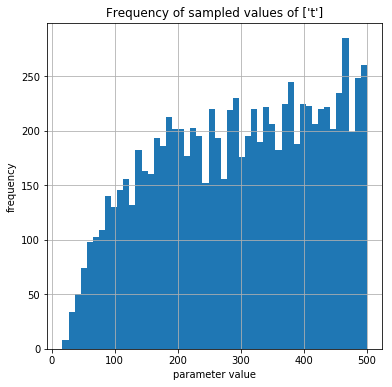

In [47]:
samplebuddy.vizhist('t')
#TODO: fix this visualization layout.